# Machine Learning for Data Science 
# KNN Classification on Vertebral Column Data
## Rajnandini Thopte 

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.

### 1. (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [289]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [290]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

### 1.(b) Pre-Processing and Exploratory data analysis:

In [291]:
# Loading data into the dataframe

#Here, we are defining a list called column_names which contains the column names that will be assigned to the DataFrame. 
#These names correspond to different biomechanical attributes and the label for the data.
column_names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", 
         "grade_of_spondylolisthesis", "label"]

#This line defines a variable called PATH, which stores the relative file path to the data file named column_2C.dat.
PATH = '../data/vertebral_column_data/column_2C.dat'

# Reading data from the file and creating a dataframe
df = pd.read_csv(PATH, header=None, delimiter=" ", names=column_names)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


##### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

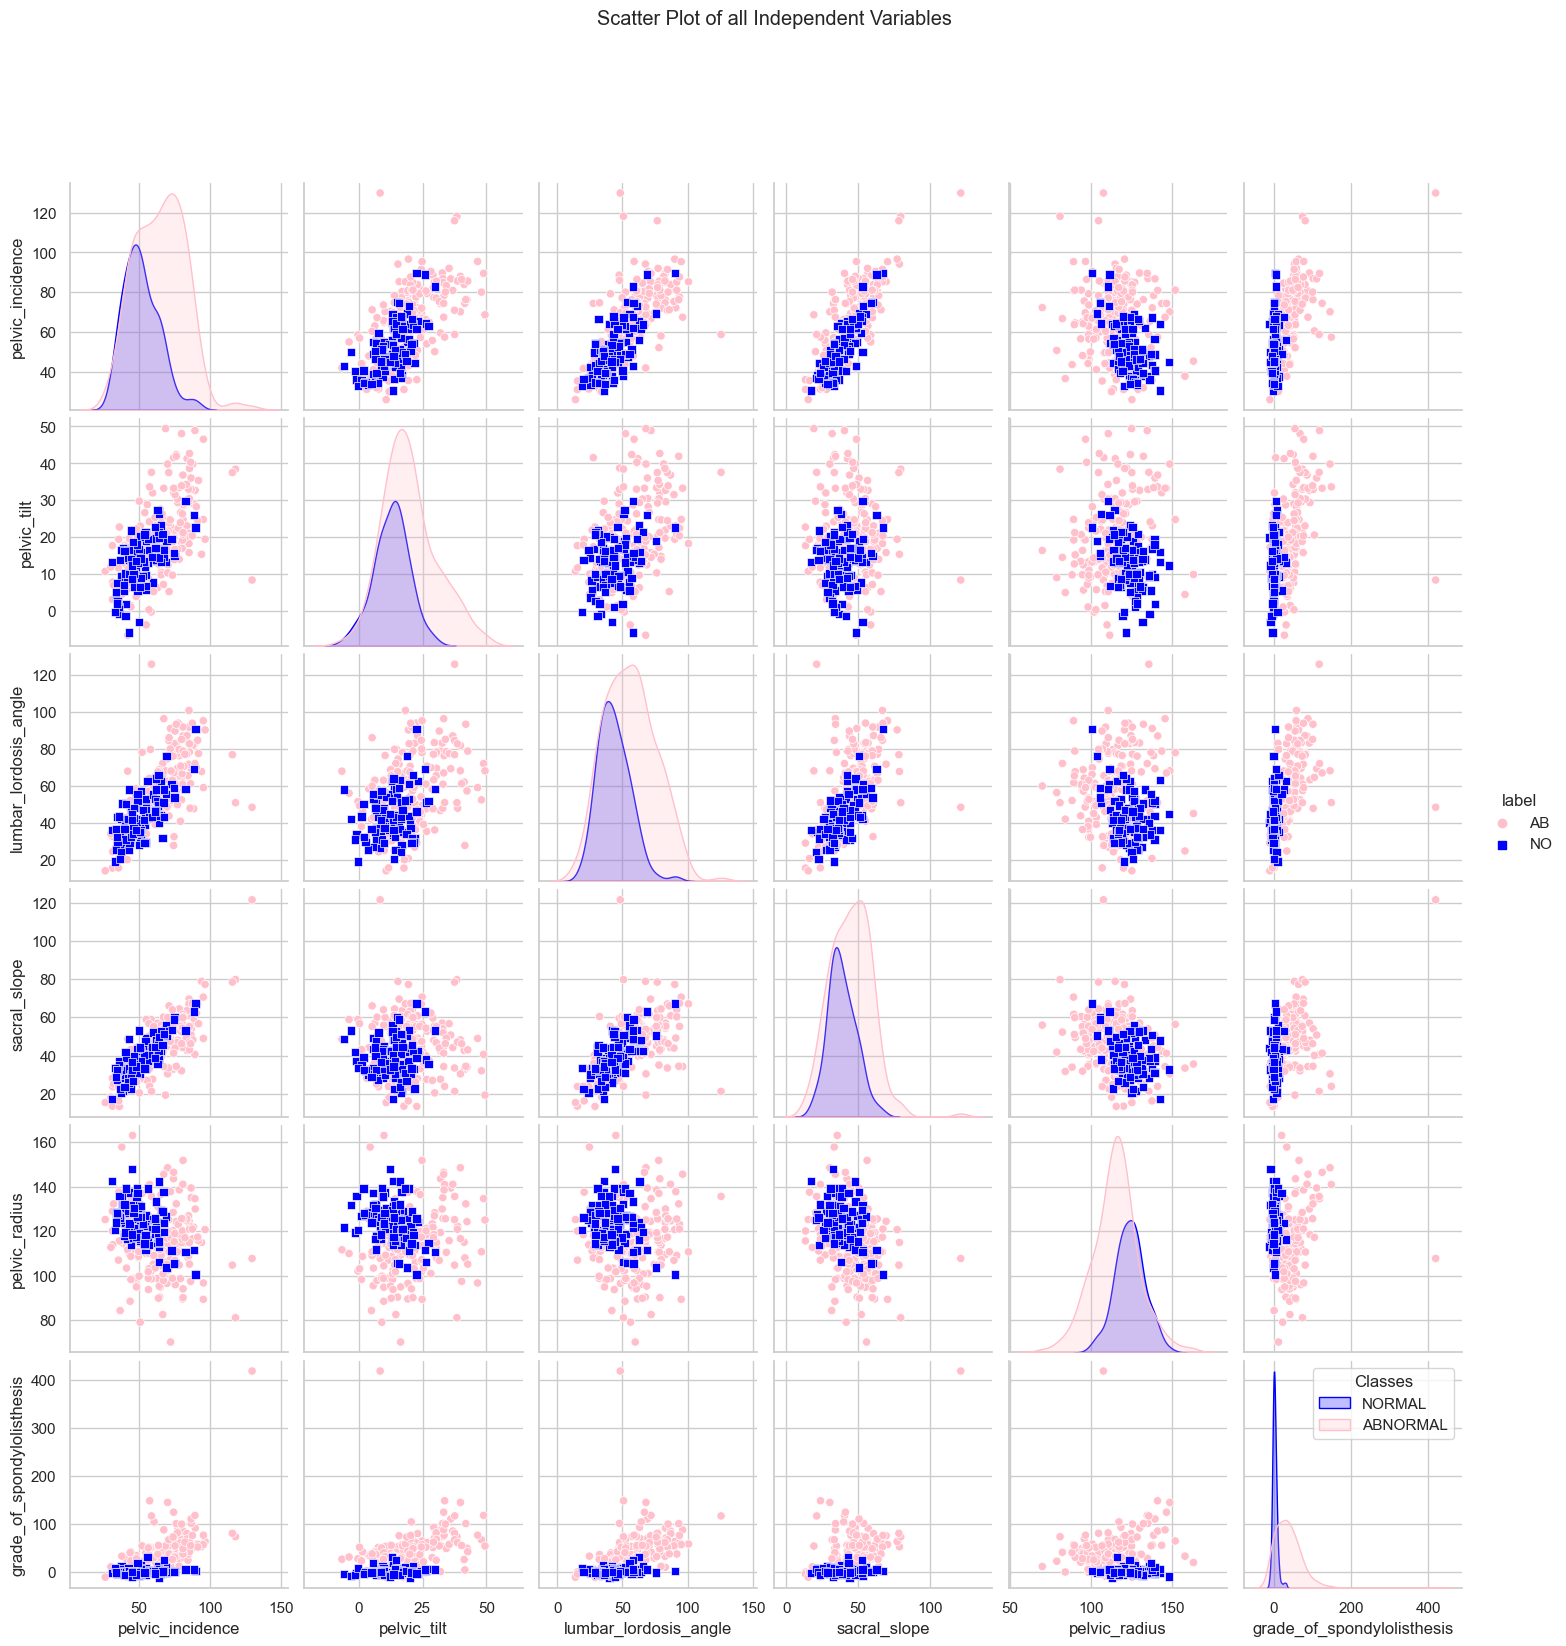

In [292]:
# Initializing and defining scatterplot
# Set the style of the plots
sns.set(style="whitegrid")

# Create a pairplot with hue based on the 'label' column (Classes 0 and 1)
fig= sns.pairplot(df, hue='label', markers=["o", "s"], palette={'NO': 'blue', 'AB': 'pink'})

fig.fig.suptitle("Scatter Plot of all Independent Variables", y=1.1)

# Add a legend to the plot
plt.legend(title='Classes', labels=['NORMAL', 'ABNORMAL'])

# Show the plot
plt.show()

In [293]:
#Here we are replacing the categorical labels 'AB' and 'NO' in the 'label' column of the DataFrame with numeric 
#values 1 and 0, respectively, to make it suitable for binary classification tasks where 1 represents 
#ABNORMAL and 0 represents NORMAL.

df.label.replace(['AB', 'NO'], [1, 0], inplace=True)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


##### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

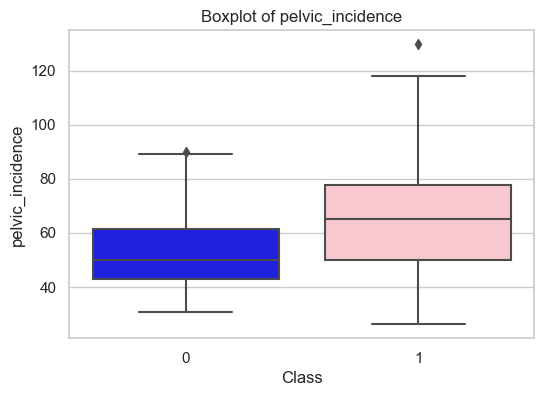

In [294]:

# Create a boxplot for 'pelvic_incidence'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['label'], y=df['pelvic_incidence'], palette={0: 'blue', 1: 'pink'})
plt.title('Boxplot of pelvic_incidence')
plt.xlabel('Class')
plt.ylabel('pelvic_incidence')
plt.show()



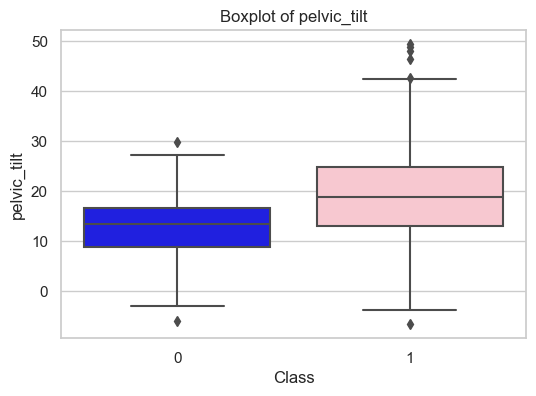

In [295]:
# Create a boxplot for 'pelvic_tilt'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['label'], y=df['pelvic_tilt'], palette={0: 'blue', 1: 'pink'})
plt.title('Boxplot of pelvic_tilt')
plt.xlabel('Class')
plt.ylabel('pelvic_tilt')
plt.show()

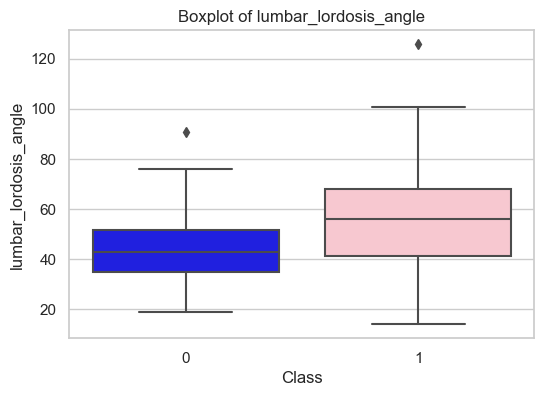

In [296]:
# Create a boxplot for 'lumbar_lordosis_angle'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['label'], y=df['lumbar_lordosis_angle'], palette={0: 'blue', 1: 'pink'})
plt.title('Boxplot of lumbar_lordosis_angle')
plt.xlabel('Class')
plt.ylabel('lumbar_lordosis_angle')
plt.show()


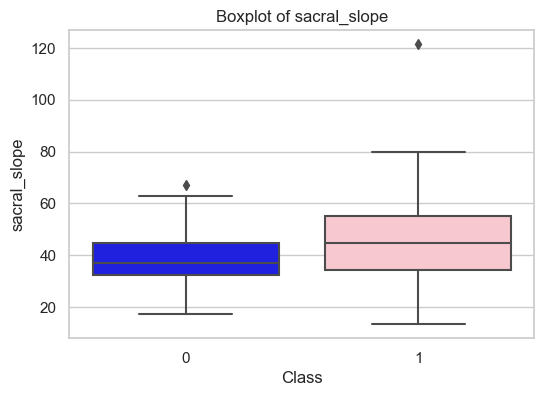

In [297]:
# Create a boxplot for 'sacral_slope'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['label'], y=df['sacral_slope'], palette={0: 'blue', 1: 'pink'})
plt.title('Boxplot of sacral_slope')
plt.xlabel('Class')
plt.ylabel('sacral_slope')
plt.show()

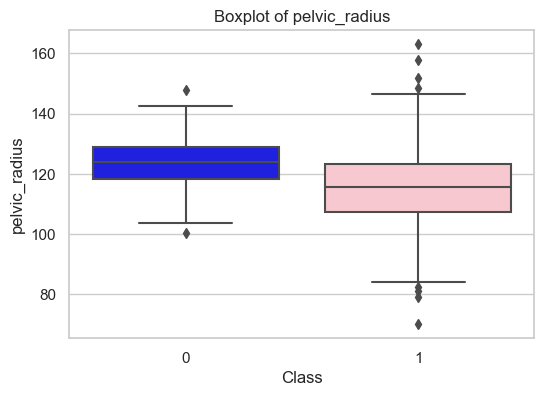

In [298]:
# Create a boxplot for 'pelvic_radius'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['label'], y=df['pelvic_radius'], palette={0: 'blue', 1: 'pink'})
plt.title('Boxplot of pelvic_radius')
plt.xlabel('Class')
plt.ylabel('pelvic_radius')
plt.show()


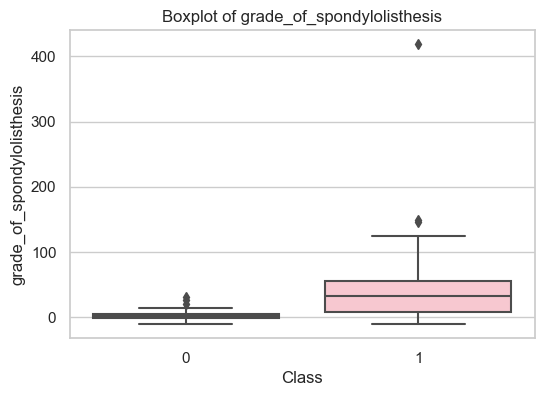

In [299]:
# Create a boxplot for 'grade_of_spondylolisthesis'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['label'], y=df['grade_of_spondylolisthesis'], palette={0: 'blue', 1: 'pink'})
plt.title('Boxplot of grade_of_spondylolisthesis')
plt.xlabel('Class')
plt.ylabel('grade_of_spondylolisthesis')
plt.show()


##### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [300]:
# Select the first 70 rows of Class 0 ('NO') as the training set
train_class_0 = df[df['label'] == 0].iloc[:70]

# Select the first 140 rows of Class 1 ('AB') as the training set
train_class_1 = df[df['label'] == 1].iloc[:140]

# Concatenate the training sets for both classes
train_data = pd.concat([train_class_0, train_class_1])

# Create the test set by excluding the rows that are in the training set
test_data = df.drop(train_data.index)

# Verify the shapes of the training and test sets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Training set shape: (210, 7)
Test set shape: (100, 7)


### 1. (c) Classification using KNN on Vertebral Column Data Set

##### i. Write code for k-nearest neighbors with Euclidean metric (or use a softwarepackage).

In [301]:
#Separating training dataset into features and labels

#Selecting all columns in the DataFrame except for the last one, which is the label column
training_features = train_data.iloc[:, 0:(len(df.columns) - 1)].values
# selecting all rows and only the last column
training_labels = train_data.iloc[:, (len(df.columns) - 1)].values

# Similary, separating testing dataset into features and labels
testing_features = test_data.iloc[:, 0:(len(df.columns) - 1)].values
testing_labels = test_data.iloc[:, (len(df.columns) - 1)].values

# Now, initializing a k-nearest neighbors (KNN) classifier using scikit-learn's KNeighborsClassifier
#n_neighbors: This sets the number of neighbors to consider when making predictions. In this case, it's set to 5, meaning the classifier will consider the labels of the five closest neighbors.
#p: This is the power parameter for the Minkowski distance metric. When p=2, it corresponds to the Euclidean distance. 
#So, this line specifies that Euclidean distance should be used as the distance metric.
#metric: This parameter explicitly sets the distance metric to be used. Setting it to 'euclidean' is consistent with p=2 for Euclidean distance.

classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')

#This line fits (or trains) the KNN classifier using the training features and labels. 
#It uses the training data to learn the relationships between features and labels, enabling it to make predictions later.

classifier.fit(training_features, training_labels)

KNeighborsClassifier(metric='euclidean')

##### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k




 For k value = 4, test error is minimum at = 0.06


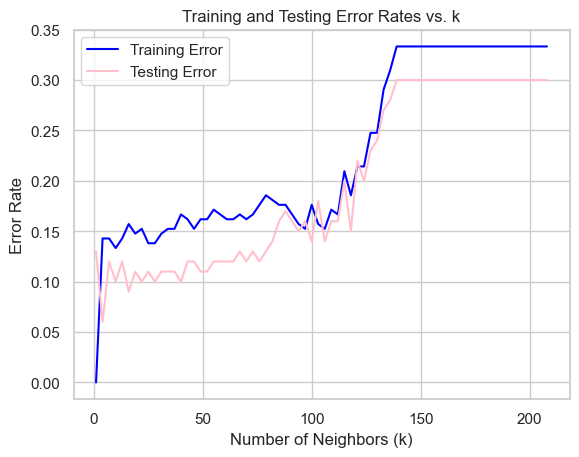

In [302]:
# Initialize empty lists to store training and testing errors
training_error_list = []
testing_error_list = []

# Initialize variables to keep track of the best k and its corresponding minimum error
best_k_value = 0
min_error = float("inf")

# Loop through different values of k in reverse order, decreasing by 3 each time
for k in range(208, 0, -3):
    # Create a KNN classifier with the current k and the Euclidean metric
    classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    
    # Fit the classifier on the training data
    classifier.fit(training_features, training_labels)
    
    # Calculate training error: 1 - accuracy_score
    # error = 1 - accuracy
    training_error = 1 - accuracy_score(training_labels, classifier.predict(training_features))
    
    # Append the training error to the training_error_list
    training_error_list.append(training_error)
    
    # Calculate testing error: 1 - accuracy_score
    testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
    
    # Check if the current testing error is lower than the minimum error found so far
    if testing_error < min_error:
        # If yes, update the minimum error and best_k_value
        min_error = testing_error
        best_k_value = k
        
     # Append the testing error to the testing_error_list
    testing_error_list.append(testing_error)
    
print(f"\n\n For k value = {best_k_value}, test error is minimum at = {round(min_error, 2)}")

# Create a range of x-values (k values) in reverse order
x = range(208, 0, -3)

# Plot the training and testing error rates against k values
plt.plot(x, training_error_list, label="Training Error", color= 'blue')
plt.plot(x, testing_error_list, label="Testing Error", color= 'pink')

# Set labels for x and y axes
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")

# Add a legend to the plot
plt.legend()

# Add a title to the plot
plt.title("Training and Testing Error Rates vs. k")

# Display grid lines on the plot
plt.grid(True)

# Show the plot
plt.show()

The most suitable among all k values taken into consideration, the best value would be the one chosen where the test error is least possible/minimum.  

Hence, as we can observe from the graph of Train + Test Error Rate vs. k and the calculated value from the code above,
the testing error is minimum,ie,  0.06 at value of k = 4.

##### Therefore k= 4 is the most suitable.



###### Calculating the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k (best possible value of k calculated above)

Confusion Matrix:
[[25  5]
 [ 1 69]]


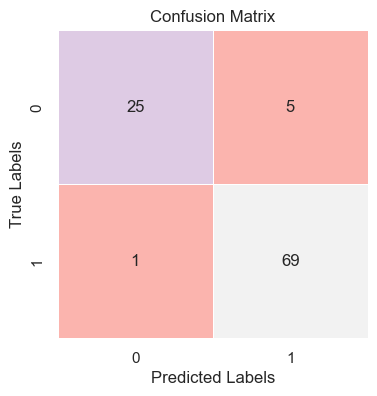

+----------------------------------+-------+
|              Metric              | Value |
+----------------------------------+-------+
|        True Positive (TP)        |  69   |
|        True Negative (TN)        |  25   |
|       False Positive (FP)        |   5   |
|       False Negative (FN)        |   1   |
|   True Positive Rate (Recall)    | 0.99  |
| True Negative Rate (Specificity) | 0.83  |
|            Precision             | 0.93  |
|             F1-Score             | 0.96  |
+----------------------------------+-------+


In [303]:
# Value of k calculated above
k_value = 4  

# Create a KNN classifier with the specific k and the Euclidean metric
classifier = KNeighborsClassifier(n_neighbors=k_value, metric='euclidean')
# Fit the classifier on the training data
classifier.fit(training_features, training_labels)

# Make predictions on the test data
y_pred = classifier.predict(testing_features)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(testing_labels, y_pred)

# Calculate true positive (TP), true negative (TN), false positive (FP), and false negative (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate true positive rate (Sensitivity or Recall)
TPR = round(TP / (TP + FN),2)

# Calculate true negative rate (Specificity)
TNR = round (TN / (TN + FP),2)

# Calculate precision
precision = round ( TP / (TP + FP),2)

# Calculate F1-score
f1_score = round(2 * (precision * TPR) / (precision + TPR),2)

# Print confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap for the confusion matrix using Seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', linewidths=.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Create a table for the metrics
metrics_table = [
    ["True Positive (TP)", TP],
    ["True Negative (TN)", TN],
    ["False Positive (FP)", FP],
    ["False Negative (FN)", FN],
    ["True Positive Rate (Recall)", TPR],
    ["True Negative Rate (Specificity)", TNR],
    ["Precision", precision],
    ["F1-Score", f1_score],
]

# Print the metrics table
table_headers = ["Metric", "Value"]
print(tabulate(metrics_table, headers=table_headers, tablefmt="pretty"))


1] True Positive (TP):
True Positives are the number of correctly predicted positive instances (e.g., class 1) by the model.
In medical diagnostics, this could represent the number of actual disease cases correctly identified as positive by a diagnostic test.

2] False Negative (FN):
False Negatives are the number of actual positive instances that the model incorrectly predicted as negative (i.e., it missed them).
In medical diagnostics, this could represent the number of actual disease cases missed by a diagnostic test.

3] True Negative (TN):
True Negatives are the number of correctly predicted negative instances (e.g., class 0) by the model.
In medical diagnostics, this could represent the number of healthy individuals correctly identified as negative by a diagnostic test.

4] False Positive (FP):
False Positives are the number of actual negative instances that the model incorrectly predicted as positive (i.e., it made a false alarm).
In medical diagnostics, this could represent the number of healthy individuals incorrectly identified as having a disease by a diagnostic test.

5] True Positive Rate (TPR), Sensitivity, or Recall:
TPR is a measure of how well the model identifies positive instances correctly.
It is calculated as TP divided by the sum of TP and FN.
TPR represents the proportion of actual positives correctly predicted by the model.
It is often used in situations where the cost of missing positive instances (FN) is high, such as disease detection.

6] True Negative Rate (TNR) or Specificity:
TNR is a measure of how well the model identifies negative instances correctly.
It is calculated as TN divided by the sum of TN and FP.
TNR represents the proportion of actual negatives correctly predicted by the model.
It is often used in situations where the cost of false alarms (FP) is high, and you want to minimize them.

7] Precision:
Precision is a measure of how well the model correctly predicts positive instances among all instances it predicted as positive.
It is calculated as TP divided by the sum of TP and FP.
Precision represents the accuracy of the positive predictions made by the model.
It is often used when you want to minimize false positives.

8] F1-Score:
The F1-Score is the harmonic mean of precision and recall (TPR).
It combines both precision and recall into a single metric, providing a balance between them.
It is calculated as 2 times the product of precision and recall divided by the sum of precision and recall.
The F1-Score is useful when there is an uneven class distribution or when you want to find a balance between precision and recall.


##### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the first bN/3c rows of Class 0 and the first N − bN/3c rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

+---------------------------------------+-------+
|                Metric                 | Value |
+---------------------------------------+-------+
|               Optimal K               |   1   |
| Error rate corresponding to optimal k | 0.08  |
+---------------------------------------+-------+


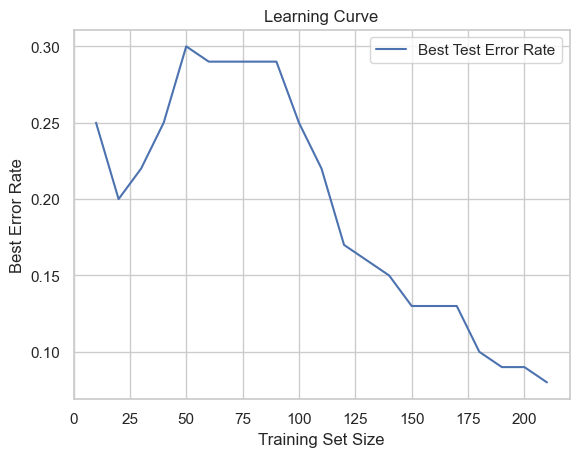

In [304]:
# Initialize empty lists to store optimal k and corresponding error rate
best_k_list = []
best_error_list = []

# Loop through different training set sizes (N)
for n in range(10, 211, 10):
    # creating truncated training sets by selecting a portion of each class (label)
     # Select 1/3 of class 0 samples
     # Select N - 1/3 of class 1 samples
    reduced_train_set = pd.concat([train_data[train_data["label"] == 0].iloc[0: n // 3, :], 
                                    train_data[train_data["label"] == 1].iloc[0: n - n // 3, :]])

    # Extract features and labels from the truncated training set
    reduced_training_features = reduced_train_set.iloc[:, 0:(len(df.columns) - 1)].values
    reduced_training_labels = reduced_train_set.iloc[:, (len(df.columns) - 1)].values
    
     # Initialize variables to keep track of the best k and minimum error
    best_k = 0
    best_error = float("inf")
    # Train the KNN model for different values of k and find the best k with the lowest error
    for k in range(1, n, 5):
        
        # Create a KNN classifier with the current k and Euclidean metric
        classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        
        # Fit the classifier on the truncated training data
        classifier.fit(reduced_training_features, reduced_training_labels)
        
        # Predict labels on the testing data using the trained classifier
        predicted_test_labels = classifier.predict(testing_features)
        
        # Calculate the truncated training error (error on the testing data)
        reduced_training_error = 1 - accuracy_score(testing_labels, predicted_test_labels)
        
        # Update the best_k and best_error if a lower error is found
        if (reduced_training_error < best_error):
            best_error = round(reduced_training_error, 2)
            best_k = k
            
    # Append the best k and its corresponding error to the lists
    best_k_list.append(best_k)
    best_error_list.append(best_error)

# Create a table for the results with headers and rows
curve_headers = ["Metric", "Value"]
curve_rows = [["Optimal K", min(best_k_list)],["Error rate corresponding to optimal k", min(best_error_list)]]

# Print the results table using tabulate
print(tabulate(curve_rows, headers=curve_headers, tablefmt="pretty"))


# plotting best_error_rate vs training set size
plt.plot(range(10, 211, 10), best_error_list, label="Best Test Error Rate")
plt.gca().set_title("Learning Curve")
plt.gca().set_xlabel("Training Set Size")
plt.gca().set_ylabel("Best Error Rate")
plt.gca().legend()
plt.show()

### 1. (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}

##### i. Minkowski Distance:  

##### Minkowski distance is a distance measured between two points in N-dimensional space. It is basically a generalization of the Euclidean distance and the Manhattan distance. Let us consider a 2-dimensional space having three points P1 (X1, Y1), P2 (X2, Y2), and P3 (X3, Y3), the Minkowski distance is given by ( |X1 – Y1|p + |X2 – Y2|p  + |X2 – Y2|p )<sup>1/p </sup> 

##### A] which becomes Manhattan Distance with p = 1.

In [305]:
# Defining a function to test K-nearest neighbors with various parameters
def test_knn_variations_custom(train_set, test_set, p_val, k_values, metric, weights='uniform'):
    # Extract training and testing features and labels
    train_features = train_set.iloc[:, :-1].values
    train_labels = train_set.iloc[:, -1].values
    test_features = test_set.iloc[:, :-1].values
    test_labels = test_set.iloc[:, -1].values

    
    metric_params = None
    # If the selected metric is "mahalanobis," prepare the metric_params
    if metric == "mahalanobis":
        metric_params = {"VI": np.linalg.pinv(np.cov(train_features, rowvar=False))}
    
    # Create a dictionary to store test errors for different k values
    k_error_dict = {}
    
    # Loop through the specified k values
    for k in k_values:
        # Create a K-nearest neighbors classifier with the given parameters
        classifier = KNeighborsClassifier(n_neighbors=k, p=p_val, metric=metric, weights=weights, metric_params=metric_params)
        # Train the classifier on the training data
        classifier.fit(train_features, train_labels)
        # Calculate the test error rate
        test_error = 1 - accuracy_score(test_labels, classifier.predict(test_features))
        # Store the test error rate in the dictionary
        k_error_dict[k] = round(test_error, 2)
        
        
    return k_error_dict


# Use the test_knn_variations_custom function to analyze the Manhattan distance
collect = test_knn_variations_custom(train_data, test_data, 1, range(1, 200, 5), "manhattan", 'uniform')

print ("Displaying Dictionary")
print (collect)


Displaying Dictionary
{1: 0.12, 6: 0.11, 11: 0.11, 16: 0.12, 21: 0.12, 26: 0.11, 31: 0.12, 36: 0.13, 41: 0.13, 46: 0.13, 51: 0.14, 56: 0.13, 61: 0.15, 66: 0.15, 71: 0.14, 76: 0.14, 81: 0.16, 86: 0.15, 91: 0.2, 96: 0.2, 101: 0.22, 106: 0.21, 111: 0.23, 116: 0.21, 121: 0.22, 126: 0.24, 131: 0.28, 136: 0.28, 141: 0.3, 146: 0.3, 151: 0.3, 156: 0.3, 161: 0.3, 166: 0.3, 171: 0.3, 176: 0.3, 181: 0.3, 186: 0.3, 191: 0.3, 196: 0.3}


In [306]:
# Defining a function to get a sorted dictionary based on values
def sorted_dict_custom(input_dict):
    sorted_dict = {}
    # Sort the dictionary keys based on their corresponding values
    sorted_keys = sorted(input_dict, key=input_dict.get)

    # Create a new dictionary with the sorted keys and their corresponding values
    for key in sorted_keys:
        sorted_dict[key] = input_dict[key]

    return sorted_dict

# Define a function to get k values associated with minimum test errors from a sorted dictionary
def k_values_for_min_test_errors_custom(error_dict):
    # Sort the input dictionary by values
    sorted_dict = sorted_dict_custom(error_dict)
    # Get the value of the first (minimum) error
    anchor_value = sorted_dict[list(sorted_dict.keys())[0]]
    min_error_k_values = {}
    
    # Iterate through the sorted dictionary to find k values with the same minimum error
    for k, value in sorted_dict.items():
        if value != anchor_value:
            # Stop the loop when the error value changes
            break
        min_error_k_values[k] = value
    
    return min_error_k_values

# Use the get_k_values_for_min_test_errors_custom function to find k values with minimum test errors for the Manhattan distance
manhattan_ans = k_values_for_min_test_errors_custom(collect)

print("Dictionary with Optimal K Values as key and corresponding Minimum Test Errors:")
manhattan_ans



Dictionary with Optimal K Values as key and corresponding Minimum Test Errors:


{6: 0.11, 11: 0.11, 26: 0.11}

In [307]:
#Displaying Table
manhattan_headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]
manhattan_rows = []
for key, value in manhattan_ans.items():
    manhattan_rows.append([key, value])
# Create a table for the results
manhattan_table = tabulate(manhattan_rows, headers=manhattan_headers, tablefmt="pretty")

# Print the table
print(manhattan_table)

+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |               0.11                |
|        11        |               0.11                |
|        26        |               0.11                |
+------------------+-----------------------------------+


We can see that three values of k provide minimum test errors, all equal to 0.11 and all values greater than 1.
We can consider the minimum value i.e. 6.  

##### Hence k<sub> optimal </sub>= 6

##### B] with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [308]:
# Defining a custom function for performing analysis with different p values for the Minkowski distance
def various_p_analysis(train_set, test_set, p_values, use_weighted=False):
    # Extract features and labels from the training and testing sets
    train_features = train_set.iloc[:, :-1].values
    train_labels = train_set.iloc[:, -1].values
    test_features = test_set.iloc[:, :-1].values
    test_labels = test_set.iloc[:, -1].values
    
    # Initialize a list to store test error values for different p values
    test_error_values = []
    
    # Iterate through the specified p values
    for p_val in p_values:
        # Create a KNeighborsClassifier with the current p value and k value found for the Manhattan distance in 1(d)iA
        classifier = KNeighborsClassifier(n_neighbors=6, p=p_val, metric="minkowski")
        # Train the classifier on the training data
        classifier.fit(train_features, train_labels)
        # Calculate the test error (1 - accuracy) for the current p value
        test_error = 1 - accuracy_score(test_labels, classifier.predict(test_features))
        # Append the test error to the list
        test_error_values.append(test_error)
        
    # Return a dictionary with the p values, log10-transformed p values, and corresponding test error values
    return {
        "P_Values": p_values,
        "Log10_P_Values": [np.log10(p) for p in p_values],
        "Test_Error_List": test_error_values
    }

# Perform the custom p analysis with a range of p values (logspace)
collect_p_analysis = various_p_analysis(train_data, test_data, np.logspace(0.1, 1, 10))



In [309]:
# Round specific columns to desired decimal places
p_analysis_df["P_Values"] = p_analysis_df["P_Values"].round(6)
p_analysis_df["Log10_P_Values"] = p_analysis_df["Log10_P_Values"].round(1)
p_analysis_df["Test_Error_List"] = p_analysis_df["Test_Error_List"].round(2)

# Convert the DataFrame to a tabulated string
p_analysis_table = tabulate(p_analysis_df, headers='keys', tablefmt='pretty')

# Print the tabulated data

print(p_analysis_table)

+---+----------+----------------+-----------------+
|   | P_Values | Log10_P_Values | Test_Error_List |
+---+----------+----------------+-----------------+
| 0 | 1.258925 |      0.1       |      0.09       |
| 1 | 1.584893 |      0.2       |      0.09       |
| 2 | 1.995262 |      0.3       |      0.08       |
| 3 | 2.511886 |      0.4       |      0.08       |
| 4 | 3.162278 |      0.5       |      0.08       |
| 5 | 3.981072 |      0.6       |      0.06       |
| 6 | 5.011872 |      0.7       |      0.07       |
| 7 | 6.309573 |      0.8       |      0.08       |
| 8 | 7.943282 |      0.9       |      0.09       |
| 9 |   10.0   |      1.0       |      0.09       |
+---+----------+----------------+-----------------+


##### Best log<sub>10</sub>(p) analysis:

In [310]:
# Find the minimum test error
min_test_error = p_analysis_df["Test_Error_List"].min()

# Filter rows with the minimum test error
min_error_rows = p_analysis_df[p_analysis_df["Test_Error_List"] == min_test_error].copy()  # Make a copy

# Round specific columns to desired decimal places using .loc
min_error_rows.loc[:, "P_Values"] = min_error_rows["P_Values"].round(6)
min_error_rows.loc[:, "Log10_P_Value"] = min_error_rows["Log10_P_Values"].round(1)
min_error_rows.loc[:, "Test_Error_List"] = min_error_rows["Test_Error_List"].round(2)

# Convert the filtered DataFrame to a tabulated string
min_error_table = tabulate(min_error_rows, headers='keys', tablefmt='pretty')

# Print the tabulated data

print ('The best log10(p) is:')
print(min_error_table)


The best log10(p) is:
+---+----------+----------------+-----------------+---------------+
|   | P_Values | Log10_P_Values | Test_Error_List | Log10_P_Value |
+---+----------+----------------+-----------------+---------------+
| 5 | 3.981072 |      0.6       |      0.06       |      0.6      |
+---+----------+----------------+-----------------+---------------+


##### C] which becomes Chebyshev Distance with p → ∞  

##### Chebyshev distance is defined as the greatest of difference between two vectors along any coordinate dimension. In other words, it is simply the maximum distance along one axis.

In [311]:
# Chebyshev distance analysis 
chebyshev_results = test_knn_variations(train_data, test_data, 1, range(1, 200, 5), "chebyshev", 'uniform')
chebyshev_min_errors = get_k_values_for_min_test_errors(chebyshev_results)
chebyshev_table_headers = ["Optimal K", "Minimum Test Error"]
chebyshev_table_data = []

# Populate the table data
for k, error in chebyshev_min_errors.items():
    chebyshev_table_data.append([k, error])

# Create a table for the results
chebyshev_table = tabulate(chebyshev_table_data, headers=chebyshev_table_headers, tablefmt="pretty")

# Print the table
print(chebyshev_table)



+-----------+--------------------+
| Optimal K | Minimum Test Error |
+-----------+--------------------+
|    16     |        0.08        |
+-----------+--------------------+


#####  Hence, k<sub>optimal</sub>=16

##### ii. Mahalanobis Distance.

##### Mahalanobis Distance is a measure of the distance between a point and a distribution. Unlike traditional distance metrics, such as Euclidean distance, Mahalanobis Distance takes into account the correlation between variables and the scales of the variables.

In [312]:
# Mahalanobis distance analysis 
custom_k_values = range(1, 200, 5)
custom_p_value = 2
mahalanobis_results = test_knn_variations(train_data, test_data, custom_p_value, custom_k_values, "mahalanobis", "uniform")
mahalanobis_min_errors = get_k_values_for_min_test_errors(mahalanobis_results)
mahalanobis_table_headers = ["Optimal K", "Minimum Test Error"]
mahalanobis_table_data = []

# Populate the table data
for k, error in mahalanobis_min_errors.items():
    mahalanobis_table_data.append([k, error])

# Create a table for the results
mahalanobis_table = tabulate(mahalanobis_table_data, headers=mahalanobis_table_headers, tablefmt="pretty")

# Print the table
print(mahalanobis_table)


+-----------+--------------------+
| Optimal K | Minimum Test Error |
+-----------+--------------------+
|     1     |        0.17        |
|     6     |        0.17        |
+-----------+--------------------+


##### Two values of k give the same corresponding minimum test errors. When multiple values of K result in the same minimum test error, it's common practice to choose the next occurrence or larger K value. In this case, since the first candidate is K = 1 and the next occurrence with the same minimum test error is K = 6, we can consider K = 6 as the chosen optimal K value. This is a reasonable approach, as selecting a slightly larger K value can often result in a more robust and stable model.

#####  Hence, k<sub>optimal</sub>= 6

### (e) The majority polling decision can be replaced by weighted decision, in which theweight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [313]:

# Define a function to perform KNN analysis for a list of metrics
def perform_knn_metric_analysis(metric_list, weights='uniform'):
    # Iterate over each metric in the metric_list
    for metric_name in metric_list:
        # Define K values to test (from 1 to 200 with step size 5 as weighted voting with Euclidean,
        #Manhattan, and Chebyshev distances and report the best test errors when  k ∈ {1, 6, 11, 16, . . . , 196}.)
        k_values = range(1, 200, 5)
        
        # Set the Minkowski distance parameter to 1 for Manhattan distance
        p_value = 1
        
        # Perform KNN analysis for the current metric, obtaining a dictionary of K values and errors
        results = test_knn_variations(train_data, test_data, p_value, k_values, metric_name, weights)
        
        # Find the K values with minimum test errors for the current metric
        min_error_values = get_k_values_for_min_test_errors(results)
        
        # Print a summary table for the current metric
        print_metric_table(metric_name, min_error_values)


# Define a function to print a table summarizing KNN analysis for a specific metric
def print_metric_table(metric_name, results_dict):
    # Print a header indicating the metric being analyzed
    print(f"Analysis for {metric_name}")
    
    # Define table headers
    headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]
    
    # Initialize an empty list to store rows of the table
    rows = [] 
    
    # Iterate over the results_dict, which contains K values and corresponding minimum test errors
    for k, error in results_dict.items():
        # Append a row with K value and the corresponding error to the rows list
        rows.append([k, error])
    
    # Generate a table using tabulate with the specified headers and rows
    table = tabulate(rows, headers=headers, tablefmt="pretty")
    
    # Print the table
    print(table)

# Perform uniform KNN analysis
print ('\n\nUNIFORM KNN ANALYSIS \n')
uniform_metrics = ["euclidean", "manhattan", "chebyshev", "mahalanobis"]
perform_knn_metric_analysis(uniform_metrics, weights='uniform')

# Perform weighted KNN analysis
print ('\n\n\nWEIGHTED KNN ANALYSIS\n')
weighted_metrics = ["euclidean", "manhattan", "chebyshev"]
perform_knn_metric_analysis(weighted_metrics, weights='distance')





UNIFORM KNN ANALYSIS 

Analysis for euclidean
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |               0.08                |
+------------------+-----------------------------------+
Analysis for manhattan
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |               0.11                |
|        11        |               0.11                |
|        26        |               0.11                |
+------------------+-----------------------------------+
Analysis for chebyshev
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        16        |               0.08            

##### (f) the lowest training error rate you achieved

The lowest training error rate that I achieved is 0.